In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import tensorflow as tf

In [2]:
# Check for GPU
import tensorflow as tf
try:
    from google.colab import drive
    IN_COLAB=True
except:
    IN_COLAB=False

if IN_COLAB:
    print("We're running Colab")
else:
    print(tf.config.list_physical_devices())
    print('\nCUDA GPU: ' + str(tf.test.is_gpu_available(cuda_only=True)))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

CUDA GPU: True


In [3]:
df = pd.read_csv('./daily01-ithaca/daily01-NY_Ithaca_13_E.csv', header = 0, index_col = 0)

In [4]:
df

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64758,20041027,1.201,-76.25,42.44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64758,20041028,1.201,-76.25,42.44,12.7,-0.3,6.2,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64758,20041029,1.201,-76.25,42.44,16.3,2.5,9.4,9.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64758,20041030,1.201,-76.25,42.44,17.5,10.5,14.0,14.5,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64758,20041031,1.201,-76.25,42.44,17.0,9.1,13.1,12.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,64758,20231101,2.622,-76.25,42.44,3.5,-2.2,0.6,0.2,3.0,...,0.352,0.328,0.329,0.364,0.021,7.0,7.7,8.7,10.0,11.6
305,64758,20231102,2.622,-76.25,42.44,6.1,-3.3,1.4,1.0,0.0,...,0.352,0.323,0.325,0.357,0.021,6.4,6.9,7.8,9.3,11.3
306,64758,20231103,2.622,-76.25,42.44,12.9,1.4,7.1,7.4,0.0,...,0.345,0.319,0.320,0.327,0.019,6.9,7.0,7.7,8.9,10.9
307,64758,20231104,2.622,-76.25,42.44,13.4,5.7,9.6,9.5,0.0,...,0.338,0.313,0.312,0.315,0.024,8.1,7.9,8.3,8.9,10.6


In [5]:
Date = pd.to_datetime(df.LST_DATE, format='%Y%m%d', errors='coerce')
df['Time'] = Date

In [6]:
df.columns

Index(['WBANNO', 'LST_DATE', 'CRX_VN', 'LONGITUDE', 'LATITUDE', 'T_DAILY_MAX',
       'T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_AVG', 'P_DAILY_CALC',
       'SOLARAD_DAILY', 'SUR_TEMP_DAILY_TYPE', 'SUR_TEMP_DAILY_MAX',
       'SUR_TEMP_DAILY_MIN', 'SUR_TEMP_DAILY_AVG', 'RH_DAILY_MAX',
       'RH_DAILY_MIN', 'RH_DAILY_AVG', 'SOIL_MOISTURE_5_DAILY',
       'SOIL_MOISTURE_10_DAILY', 'SOIL_MOISTURE_20_DAILY',
       'SOIL_MOISTURE_50_DAILY', 'SOIL_MOISTURE_100_DAILY',
       'SOIL_TEMP_5_DAILY', 'SOIL_TEMP_10_DAILY', 'SOIL_TEMP_20_DAILY',
       'SOIL_TEMP_50_DAILY', 'SOIL_TEMP_100_DAILY', 'Time'],
      dtype='object')

In [7]:
data = df[['T_DAILY_MAX',
       'T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_AVG', 'P_DAILY_CALC',
       'SOLARAD_DAILY', 'SUR_TEMP_DAILY_MAX',
       'SUR_TEMP_DAILY_MIN', 'SUR_TEMP_DAILY_AVG']]

In [8]:
data.index = df['Time']

In [9]:
# check for N/A
data.min()

T_DAILY_MAX          -17.90
T_DAILY_MIN          -30.90
T_DAILY_MEAN         -24.40
T_DAILY_AVG          -23.20
P_DAILY_CALC           0.00
SOLARAD_DAILY          0.06
SUR_TEMP_DAILY_MAX   -16.50
SUR_TEMP_DAILY_MIN   -36.00
SUR_TEMP_DAILY_AVG   -23.60
dtype: float64

In [10]:
data

,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,SUR_TEMP_DAILY_MAX,SUR_TEMP_DAILY_MIN,SUR_TEMP_DAILY_AVG
Time,,,,,,,,,
2004-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-28,12.7,-0.3,6.2,5.0,0.0,12.67,NaN,NaN,6.5
2004-10-29,16.3,2.5,9.4,9.7,0.0,8.99,NaN,NaN,10.2
2004-10-30,17.5,10.5,14.0,14.5,1.8,4.14,NaN,NaN,13.5
2004-10-31,17.0,9.1,13.1,12.6,0.0,3.42,NaN,NaN,10.8
...,...,...,...,...,...,...,...,...,...
2023-11-01,3.5,-2.2,0.6,0.2,3.0,5.25,9.0,-4.6,0.3
2023-11-02,6.1,-3.3,1.4,1.0,0.0,6.21,12.1,-5.2,0.6
2023-11-03,12.9,1.4,7.1,7.4,0.0,10.68,13.5,-1.1,5.7


In [11]:
data.isna().sum()

T_DAILY_MAX            76
T_DAILY_MIN            76
T_DAILY_MEAN           76
T_DAILY_AVG            77
P_DAILY_CALC           47
SOLARAD_DAILY          56
SUR_TEMP_DAILY_MAX    438
SUR_TEMP_DAILY_MIN    438
SUR_TEMP_DAILY_AVG     56
dtype: int64

In [12]:
# Check data types
data.dtypes

T_DAILY_MAX           float64
T_DAILY_MIN           float64
T_DAILY_MEAN          float64
T_DAILY_AVG           float64
P_DAILY_CALC          float64
SOLARAD_DAILY         float64
SUR_TEMP_DAILY_MAX    float64
SUR_TEMP_DAILY_MIN    float64
SUR_TEMP_DAILY_AVG    float64
dtype: object

In [13]:
data.shape

(6949, 9)

In [14]:
# forward fill the missing values  
data.ffill(axis = 0, inplace = True) 

In [15]:
data

,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,SUR_TEMP_DAILY_MAX,SUR_TEMP_DAILY_MIN,SUR_TEMP_DAILY_AVG
Time,,,,,,,,,
2004-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-28,12.7,-0.3,6.2,5.0,0.0,12.67,NaN,NaN,6.5
2004-10-29,16.3,2.5,9.4,9.7,0.0,8.99,NaN,NaN,10.2
2004-10-30,17.5,10.5,14.0,14.5,1.8,4.14,NaN,NaN,13.5
2004-10-31,17.0,9.1,13.1,12.6,0.0,3.42,NaN,NaN,10.8
...,...,...,...,...,...,...,...,...,...
2023-11-01,3.5,-2.2,0.6,0.2,3.0,5.25,9.0,-4.6,0.3
2023-11-02,6.1,-3.3,1.4,1.0,0.0,6.21,12.1,-5.2,0.6
2023-11-03,12.9,1.4,7.1,7.4,0.0,10.68,13.5,-1.1,5.7


In [16]:
# drop NaN at the top
data.dropna(inplace = True)

In [17]:
# set target
data['target'] = data['T_DAILY_AVG']

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(scaled_data, test_size=0.2, shuffle = False)

In [20]:
train.shape

(5252, 10)

In [21]:
test.shape

(1313, 10)

In [22]:
# splitting data into sequences
def split_sequences(features, target, seq_len, forecast_len):
    X,y = list(), list()
    for i in range(len(features)):
        end_input = i + seq_len
        end_predict = end_input + forecast_len
        if end_predict > len(features)-1:
            break
        seq_x, seq_y = features[i:end_input,:], target[end_input:end_predict]
        X.append(seq_x)
        y.append(seq_y)
    return tf.convert_to_tensor(X, dtype=tf.float64), tf.convert_to_tensor(y, dtype=tf.float64)

In [23]:
# input:predict = 4:1
seq_len = 100
forecast_len = 1
X_train, y_train = split_sequences(train[:,:-1], train[:,-1], seq_len = seq_len, forecast_len = forecast_len)
X_test, y_test = split_sequences(test[:,:-1], test[:,-1],seq_len = seq_len, forecast_len =  forecast_len)

In [24]:
X_train.shape

TensorShape([5151, 100, 9])

In [25]:
y_train.shape

TensorShape([5151, 1])

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RNN, LSTMCell, Input
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

model = Sequential([
    LSTM(units=24, activation = 'tanh', input_shape = X_train.shape[1:], return_sequences=True, name = 'lstm_1'),
    LSTM(units=24, activation = 'tanh' , input_shape = X_train.shape[1:], return_sequences=False, name = 'lstm_2'),
    Dense(units=forecast_len, activation = None, name = 'dense_1')
    
], name = 'sequential')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 24)           3264      
_________________________________________________________________
lstm_2 (LSTM)                (None, 24)                4704      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 7,993
Trainable params: 7,993
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.001) , metrics = 'acc')
model.fit(X_train, 
          y_train, 
          batch_size=48,
          epochs=100,
          verbose='auto',
          callbacks=None,
          validation_split=0.2,
          shuffle=True)

Epoch 1/100
86/86 [==============================] - 5s 24ms/step - loss: 0.0031 - acc: 4.8544e-04 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 2/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0031 - acc: 4.8544e-04 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 3/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0030 - acc: 4.8544e-04 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 4/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0030 - acc: 4.8544e-04 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 5/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0030 - acc: 4.8544e-04 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 6/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0030 - acc: 4.8544e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 7/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0030 - acc: 4.8544e-04 - val_loss: 0.0048 - val_acc: 0.0000e+00
Epoch 8/100
86/86 [=

In [40]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

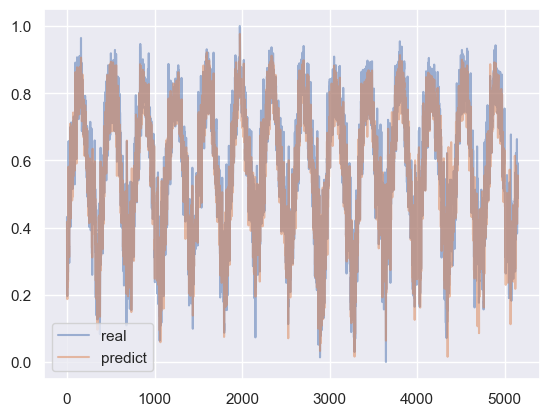

In [41]:
plt.plot(y_train[:,0], label = 'real', alpha = 0.5)
plt.plot(y_hat_train[:,0], label = 'predict', alpha = 0.5)
plt.legend()
plt.show()

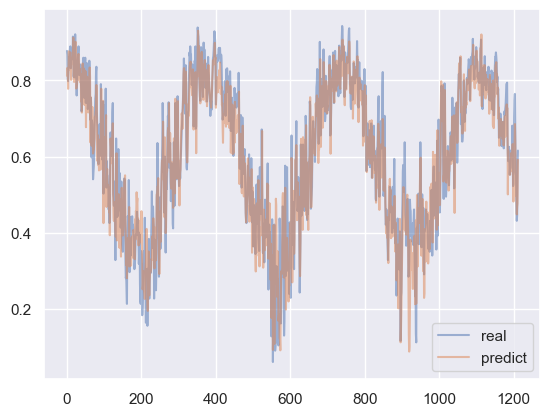

In [42]:
plt.plot(y_test[:,0], label = 'real', alpha = 0.5)
plt.plot(y_hat_test[:,0], label = 'predict', alpha = 0.5)
plt.legend()
plt.show()

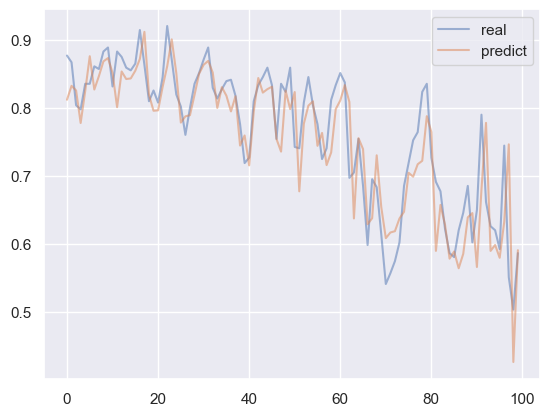

In [43]:
plt.plot(y_test[:100,0], label = 'real', alpha = 0.5)
plt.plot(y_hat_test[:100,0], label = 'predict', alpha = 0.5)
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import r2_score

print('r2')
print('train set:', r2_score(y_train, y_hat_train, sample_weight=None))
print('test set:', r2_score(y_test, y_hat_test, sample_weight=None))

r2
train set: 0.9216905995157464
test set: 0.8699900072752703
